In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.layers import BatchNormalization, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc


In [ ]:

#  Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/drive/MyDrive/Gabor_cropped_Final/Train'
test_dir = '/content/drive/MyDrive/Gabor_cropped_Final/Test'

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Gabor_cropped_Final/Train',
    target_size=(524, 524),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Gabor_cropped_Final/Test',
    target_size=(524, 524),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

Found 1080 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

model = Sequential()

# Layer 1
model.add(Conv2D(6, kernel_size=(5, 5), input_shape=(524, 524, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Layer 2
model.add(Conv2D(16, kernel_size=(5, 5)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flatten the tensor
model.add(Flatten())

# Layer 3
model.add(Dense(120, activation='relu', kernel_regularizer=l2(0.02)))
model.add(Dropout(0.2))

# Layer 4
model.add(Dense(84, activation='relu', kernel_regularizer=l2(0.02)))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile with binary_crossentropy for binary classification
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Added ReduceLROnPlateau callback to reduce the learning rate if the validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=0.00001)

# Output the model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 520, 520, 6)       156       
                                                                 
 batch_normalization_9 (Bat  (None, 520, 520, 6)       24        
 chNormalization)                                                
                                                                 
 activation_8 (Activation)   (None, 520, 520, 6)       0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 260, 260, 6)       0         
 ng2D)                                                           
                                                                 
 dropout_32 (Dropout)        (None, 260, 260, 6)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 256, 256, 16)     

In [ ]:
# Compile and Train
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
history = model.fit(train_generator, epochs=20, validation_data=test_generator, callbacks=[early_stop])

Epoch 1/20
34/34 [==============================] - 17s 417ms/step - loss: 9.1236 - accuracy: 0.5750 - val_loss: 6.7652 - val_accuracy: 0.5000
Epoch 2/20
34/34 [==============================] - 14s 422ms/step - loss: 6.3454 - accuracy: 0.6750 - val_loss: 6.1853 - val_accuracy: 0.5000
Epoch 3/20
34/34 [==============================] - 14s 422ms/step - loss: 5.5844 - accuracy: 0.7343 - val_loss: 5.5530 - val_accuracy: 0.5000
Epoch 4/20
34/34 [==============================] - 14s 415ms/step - loss: 4.9800 - accuracy: 0.7528 - val_loss: 5.0704 - val_accuracy: 0.5000
Epoch 5/20
34/34 [==============================] - 14s 407ms/step - loss: 4.4690 - accuracy: 0.7917 - val_loss: 4.5435 - val_accuracy: 0.5333
Epoch 6/20
34/34 [==============================] - 14s 423ms/step - loss: 4.1215 - accuracy: 0.7676 - val_loss: 4.1627 - val_accuracy: 0.6000
Epoch 7/20
34/34 [==============================] - 14s 416ms/step - loss: 3.7771 - accuracy: 0.7861 - val_loss: 3.8413 - val_accuracy: 0.5833

In [ ]:
# Evaluation

loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 [==============================] - 1s 339ms/step - loss: 1.6965 - accuracy: 0.8667
Test Loss: 1.6965
Test Accuracy: 86.67%


In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
import numpy as np

# Get the true labels and predicted labels
y_true = test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.round(predictions).astype(int).flatten()  # Convert probabilities to class labels

# Calculate F1-score, Recall, and Precision
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

2/2 [==============================] - 1s 345ms/step
Precision: 0.5000
Recall: 0.5000
F1-score: 0.4949


2/2 [==============================] - 1s 321ms/step


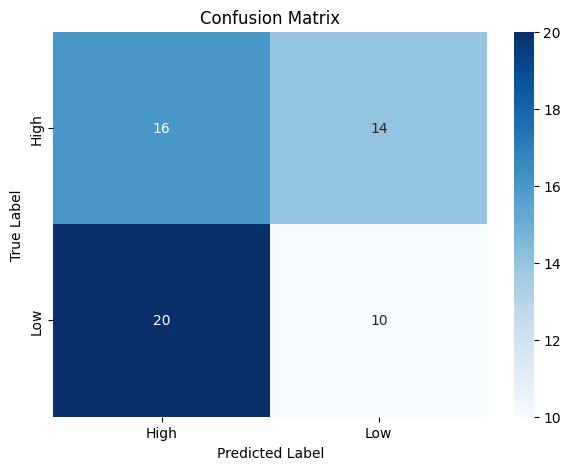

In [ ]:

# Get the true labels and predicted labels
y_true = test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.round(predictions).astype(int).flatten()  # Convert probabilities to class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low'], yticklabels=['High', 'Low'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()






2/2 [==============================] - 1s 329ms/step


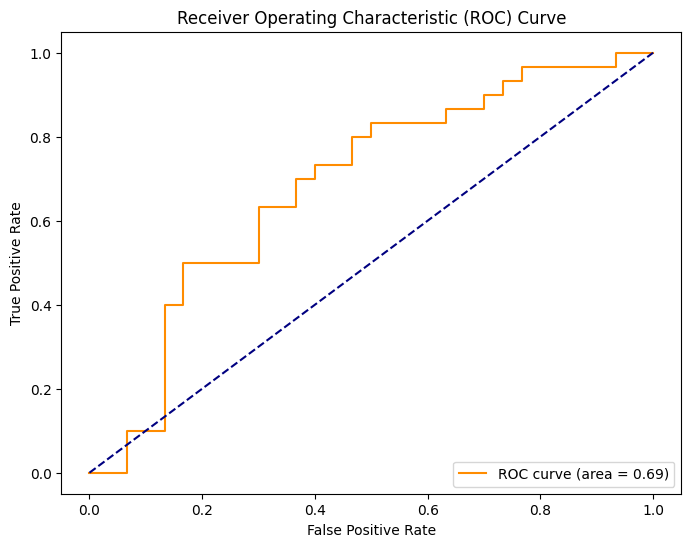

In [ ]:

# Get the true labels and predicted labels
y_true = test_generator.classes
predictions = model.predict(test_generator)
y_pred_prob = predictions[:, 0]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()